In [2]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 3.4MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [0]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cd drive/My Drive/Colab Notebooks/Data-Workshop/Matrix_part_two

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/Data-Workshop/Matrix_part_two'
/content/drive/My Drive/Colab Notebooks/Data-Workshop/Matrix_part_two


In [5]:
cd Data-Workshop-Cars/

/content/drive/My Drive/Colab Notebooks/Data-Workshop/Matrix_part_two/Data-Workshop-Cars


In [6]:
ls

data/  LICENSE  README.md


In [0]:
df = pd.read_hdf('data/car.h5')

In [8]:
df.shape

(106494, 155)

In [9]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

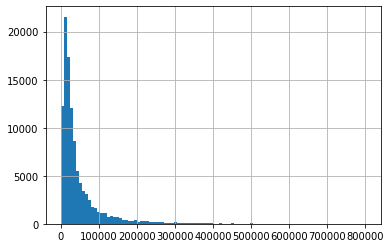

In [13]:
df['price_value'].hist(bins=100);

In [18]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

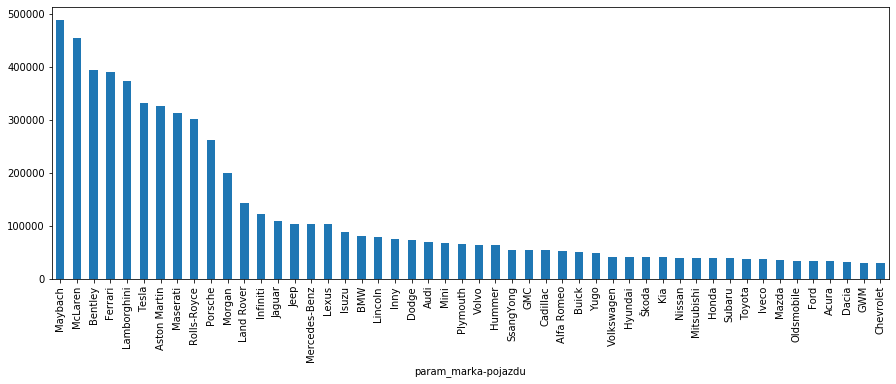

In [33]:
df.groupby('param_marka-pojazdu')['price_value'].agg(np.mean).sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15, 5));


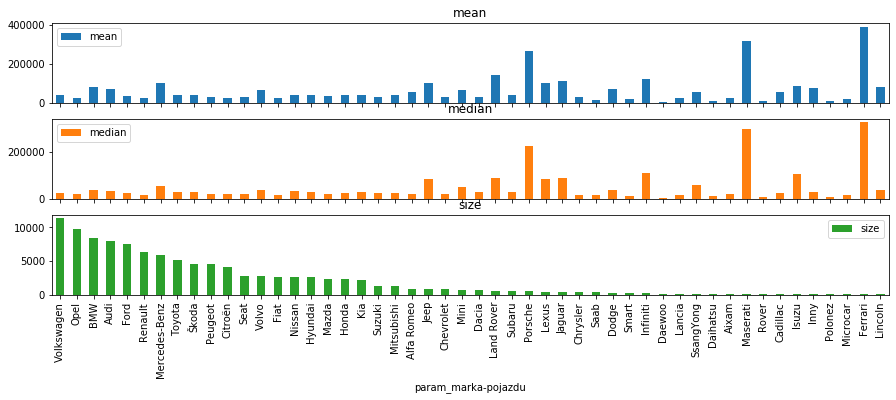

In [43]:
# 3 ujecia - srednia mediana i ilosc obserwacji zeby wychwycic outliersy
df.groupby('param_marka-pojazdu')['price_value'].agg([np.mean, np.median, np.size]).sort_values(by='size' , ascending=False).head(50).plot(kind='bar', figsize=(15, 5), subplots=True);


In [0]:
# powzyszy kod zapiszmyjako funkcje gdzie mozemy badac rozne parametry/ficzery, podawać ile wartosci ma wyswietlac model itp

def group_and_plot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
      df
      .groupby(feat_groupby)[feat_agg]
      .agg(agg_funcs)
      .sort_values(by=feat_sort, ascending=False)
      .head(top)

  ).plot(kind='bar', figsize=(15,5), subplots=subplots)



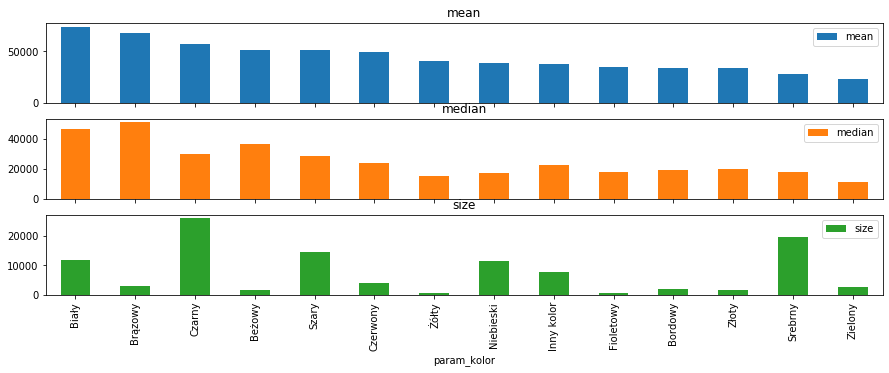

In [65]:
group_and_plot('param_kolor', feat_sort='mean');

In [0]:
# commitujemy do githuba
